<table style="width:100%; background-color:transparent; font-style:italic">
  <tr style="background-color:transparent">   
    <td style="text-align:left; background-color:transparent">Datenanalyse mit Python</td>
    <td style="text-align:center; background-color:transparent">https://github.com/manfred2020/DA_mit_Python</td>
    <td style="text-align:right; background-color:transparent">Manfred Hammerl</td>
  </tr>
</table>

# 6) Daten gruppieren, sortieren und filtern

Zu Beginn wie üblich **Pandas** importieren und den bereits bekannten Datensatz laden. Damit sehen wir uns dann div. Möglichkeiten an, Daten zu gruppieren bzw. verschiedene Auswertungen anhand der gruppierten Daten vorzunehmen.

In [1]:
import pandas as pd

daten = pd.read_csv("C:\\Datenfiles\\daten.csv")

daten.head(3).round(2)

,sex,age,wohnort,volksmusik,hardrock
0,1,50,2,2.67,3.67
1,1,57,1,1.00,3.33
2,2,66,3,2.00,4.33


### 6.1) Daten gruppieren

##### GroupBy()

Die Funktion **groupby()** ist - wie wir sehen werden - sehr nützlich und vielseitig einsetzbar. Sehen wir uns für den Anfang die Mittelwerte unserer Variablen pro Geschlecht an, indem wir **groupby()** und **mean()** kombinieren.

[pandas.DataFrame.groupby](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.groupby.html#pandas.DataFrame.groupby)

[GroupBy](https://pandas.pydata.org/pandas-docs/stable/reference/groupby.html)

In [2]:
daten.groupby(['sex']).mean().round(3) # z.B. um die Mittelwerte aller Variablen pro Geschlecht auszugeben

,age,wohnort,volksmusik,hardrock
sex,,,,
1,37.62,2.090,3.771,3.157
2,39.68,2.227,3.767,2.747


Wie in obiger Tabelle ersichtlich, wurden pro Geschlecht (1 = weiblich, 2 = männlich) die Mittelwerte der übrigen Variablen ausgegeben.

Analog funktioniert dies auch für Korrelationen. Unten ein Beispiel, in welchem wir **groupby()** und **corr()** kombinieren und somit getrennt nach Geschlecht die Korrelationen (in diesem Fall der Spearman Rangkorrelationskoeffizient) ausgegeben werden. Angezeigt wird nur der Korrelationskoeffizient (und nicht die Fallzahl oder die Irrtumswahrscheinlichkeit, wie man es bspw. von SPSS kennt), mehr kann **Pandas** nicht liefern.

In [3]:
daten.groupby(['sex']).corr(method = 'spearman').round(2)

age  wohnort  volksmusik  hardrock
sex                                                
1   age         1.00    -0.15       -0.47      0.33
    wohnort    -0.15     1.00        0.23     -0.06
    volksmusik -0.47     0.23        1.00     -0.32
    hardrock    0.33    -0.06       -0.32      1.00
2   age         1.00    -0.13       -0.37      0.35
    wohnort    -0.13     1.00        0.26      0.05
    volksmusik -0.37     0.26        1.00     -0.31
    hardrock    0.35     0.05       -0.31      1.00

Selbstverständlich kann man die Ausgabe nach Belieben optimieren, bspw. wird im Folgenden nur die Korrelation von *hardrock* und *volksmusik* pro Geschlecht ausgegeben. Beachte: Alle drei Variablen, also auch die Gruppierungsvariable, müssen bereits zu Beginn aus dem Dataframe ausgewählt werden ('daten[[.....]]'), ansonsten wird die Gruppierungsvariable nicht erkannt ('groupby([...])')!

In [9]:
daten[['sex', 'hardrock', 'volksmusik']].groupby(['sex']).corr(method = 'pearson').round(2)

hardrock  volksmusik
sex                                 
1   hardrock        1.00       -0.34
    volksmusik     -0.34        1.00
2   hardrock        1.00       -0.30
    volksmusik     -0.30        1.00

Im Zusammenhang mit Gruppierungen können viele weitere Auswertungsfunktionen angewandt werden - nicht nur die gezeigten *mean()* und *corr()*, bspw.:

|Funktion| |Funktion| |
|-|-|-|-|
|**min()**|Minimum|**count()**|Häufigkeiten exkl. NaN|
|**max()**|Maximum|**size()**|Häufigkeiten inkl. NaN|
|**median()**|Median|**mad()**|Mittlere absolute Abweichung vom Median|
|**var()**|Varianz|**std()**|Standardabweichung|
|**sum()**|Summe|**sem()**|Standardfehler des Mittelwerts|

##### Die describe() Funktion
Wir kennen die **describe()** Funktion bereits aus dem vorangegangenen Kapitel. Sehen wir uns nun div. Kennzahlen der Variable *age* getrennt für beide Geschlechter an; komibinieren wir also **groupby()** mit **describe()**.

In [10]:
daten.groupby('sex').describe()['age'].round(2) # 'unstack()' auch möglich für andere Anzeige

,count,mean,std,min,25%,50%,75%,max
sex,,,,,,,,
1,166.0,37.62,14.11,21.0,25.0,35.0,48.75,92.0
2,128.0,39.68,13.66,15.0,28.0,37.0,51.00,77.0


Man kann dies auch so schreiben (diesmal gruppiert nach *wohnort*):

daten.groupby('wohnort')['age'].describe().round(2)

Beide Schreibweisen führen zum gleichen Ergebnis. Mit den Möglichkeiten von **groupby()** und **describe()** kann man sich schnell einen guten Überblick über einige Variablen bzw. Gruppen verschaffen.

In [32]:
daten.groupby(['wohnort'])['age'].describe().unstack().loc[['count', 'mean', 'std']].round(2)

# Dies funktioniert nur mit 'unstack()'!

       wohnort
count  1           95.00
       2           60.00
       3          139.00
mean   1           40.37
       2           40.43
       3           36.42
std    1           13.80
       2           14.11
       3           13.74
dtype: float64

Man kann auch 2 Gruppierungsvariablen angeben; im folgenden Fall wird wieder nach *wohnort* sowie auf einer übergeordneten Ebenen nach *sex* gruppiert.

In [34]:
daten[['age', 'sex', 'wohnort']].groupby(['sex', 'wohnort'])['age'].describe().round(2)

#'loc[]', um nur ausgewählte Kennzahlen auszugeben, funktioniert bei solcher mehrfacher Gruppierung nicht

count   mean    std   min   25%   50%    75%   max
sex wohnort                                                    
1   1         58.0  39.88  14.24  22.0  26.0  42.5  49.75  92.0
    2         35.0  39.00  13.63  22.0  26.0  37.0  50.00  69.0
    3         73.0  35.16  14.03  21.0  25.0  27.0  47.00  75.0
2   1         37.0  41.14  13.24  15.0  34.0  41.0  50.00  77.0
    2         25.0  42.44  14.81  21.0  28.0  45.0  55.00  72.0
    3         66.0  37.82  13.38  20.0  26.0  37.0  47.50  75.0

Im Folgenden wird nach zwei Variabeln, *sex* und *wohnort* gruppiert und jeweils ausschließlich(!) der Mittelwert des Alters ausgegeben. Mit der **describe()** Funktion geht das nicht, mit den div. anderen Auswertungsfunktionen (z.B. **mean()**, **median()**, **count()**, usw.) schon.

In [9]:
daten[['age', 'sex', 'wohnort']].groupby(['sex', 'wohnort'])['age'].mean().round(2).unstack()

wohnort,1,2,3
sex,,,
1,39.88,39.00,35.16
2,41.14,42.44,37.82


##### Die aggregate() Funktion

Die **aggregate()** Funktion kann hier ev. weiterhelfen, sie erweitert nämlich unseren Spielraum bez. der gezielten Ausgabe gewünschter Kennzahlen etwas. Im ersten Beispiel wird - getrennt nach Wohnort - für alle Variablen jeweils der Mittelwert und der Median ausgegeben. **aggregate()** kann übrigens auch mit **agg()** abgekürzt werden.

[10 Python Pandas tips to make data analysis faster](https://towardsdatascience.com/10-python-pandas-tricks-to-make-data-analysis-more-enjoyable-cb8f55af8c30)

[pandas.DataFrame.aggregate](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.aggregate.html)

In [10]:
daten.groupby('wohnort').aggregate(['mean', 'median']).round(2) # Man kann 'aggregate' oder kurz 'agg' schreiben.

sex           age        volksmusik        hardrock       
         mean median   mean median       mean median     mean median
wohnort                                                             
1        1.39      1  40.37     42       3.39   3.67     2.99    3.0
2        1.42      1  40.43     39       3.68   4.00     3.06    3.0
3        1.47      1  36.42     34       4.07   4.33     2.93    3.0

Nun wählen wir sinnvoller Weise nur 2 metrischen Variablen, *volksmusik* und *hardrock* zur Ausgabe des Mittelwerts und Medians aus.

In [11]:
daten.groupby('wohnort').aggregate({'volksmusik' : ['mean', 'median'], 'hardrock' : ['mean', 'median']}).round(2)

volksmusik        hardrock       
              mean median     mean median
wohnort                                  
1             3.39   3.67     2.99    3.0
2             3.68   4.00     3.06    3.0
3             4.07   4.33     2.93    3.0

Und nun gruppieren wir - wie wir es weiter oben schon versucht haben - nach zwei Variablen (*sex* und *wohnort*) und lassen uns für die Variable *age* den Mittelwert und den Median sowie für die Variable *hardrock* den kleinsten und den größten Wert sowie die Gesamtzahl der Nennungen anzeigen.

In [12]:
daten.groupby(['sex','wohnort']).agg({'age' : ['mean', 'median'], 'hardrock' : ['min', 'max', 'count']}).round(2)

age        hardrock            
              mean median      min   max count
sex wohnort                                   
1   1        39.88   42.5     1.00  4.67    58
    2        39.00   37.0     1.33  5.00    35
    3        35.16   27.0     1.00  5.00    73
2   1        41.14   41.0     1.00  5.00    37
    2        42.44   45.0     1.00  5.00    25
    3        37.82   37.0     1.00  5.00    66

##### Die transform() Funktion

Die **transform()** Funktion liefert in Kombination mit **groupby()** nicht den üblichen gruppierten (aggregierten) Output, sondern ermöglicht gruppenweise Berechnungen, welche dann für jede Zeile im Datensatz ausgegeben werden. Im Beispiel unten ist die Zentrierung der Variable *age* innerhalb der beiden Gruppen der Variable *sex* wiedergegeben. Um zu zeigen, dass korrekt - pro Gruppe - gerechnet wurde, wird im Anschluss auch über den gesamten Datensatz zentriert und die Ergebnisse grafisch veranschaulicht.

[pandas.DataFrame.transform](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.transform.html)

In [13]:
data_gruppiert = daten[['age', 'sex']].groupby(['sex']).transform(lambda x: x-x.mean()).round(2)
# Hier wird der Altersmittelwert von jeder Beobachtung abgezogen, 'age' wird also zentriert - und zwar innerhalb jeder Gruppe von 'sex'!

In [14]:
data_gruppiert

,age
0,12.38
1,19.38
2,26.32
3,12.38
4,22.38
...,...
289,-13.62
290,-3.68
291,-8.68
292,-0.62


Nun noch schnell den Spaltennamen (*age*) ändern, da wird später noch eine zweite Spalte mit dem Namen *age* haben werden und die Spalten natürlich unterscheiden möchten.

In [15]:
data_gruppiert.rename(columns = {"age" : "age_gruppiert"}, inplace = True)

In [16]:
data_gruppiert.head()

,age_gruppiert
0,12.38
1,19.38
2,26.32
3,12.38
4,22.38


Hier nun zum Vergleich die 'normale' Zentrierung mit dem Altersmittelwert der Gesamtstichprobe:

In [17]:
data_gesamt = daten['age'].transform(lambda x: x-x.mean()).round(2)

In [18]:
data_gesamt

0      11.48
1      18.48
2      27.48
3      11.48
4      21.48
       ...  
289   -14.52
290    -2.52
291    -7.52
292    -1.52
293   -15.52
Name: age, Length: 294, dtype: float64

Wir haben jetzt das Alter sowohl nach Geschlecht als auch gesamt zentriert - es liegen nun zwei zentrierte Altersvariablen vor. Diese sollen nun für die weitere Analyse in eine Dataframe gebracht werden. Ausserdem soll die Variable *sex* mit in diese Dataframe.

In [35]:
data = pd.concat([data_gruppiert, data_gesamt, daten['sex']], axis = 1)
# 'axis = 1' bezieht sich auf die Spalten, 'axis = 0' würde sich auf die Zeilen beziehen

Hier das fertige Dataframe mit den beiden zentrierten Altersvariablen sowie der Variable *sex*. Die Spalte *age* repräsentiert die über den gesamten Datensatz zentrierte Altersvariable.

In [20]:
data.head()

,age_gruppiert,age,sex
0,12.38,11.48,1
1,19.38,18.48,1
2,26.32,27.48,2
3,12.38,11.48,1
4,22.38,21.48,1


Sehen wir uns nun anhand zweier Grafiken an, ob unsere Berechnung mit **groupby()** und **transform()** vorhin funktioniert hat, d.h. ob die Altersvariable tatsächlich pro Geschlecht zentriert wurde. Ist dies der Fall, so müsste der Mittelwert pro Geschlecht bei 0 liegen. Dagegen liegt der Mittelwert der über den gesamten Datensatz zentrierten Altersvariable pro Geschlecht wohl nicht bei 0.

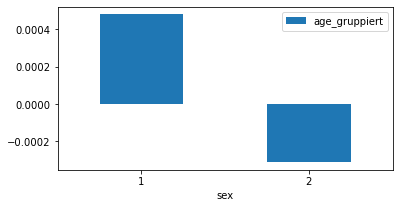

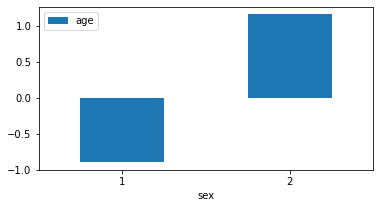

In [25]:
ax = data.groupby(['sex']).mean().plot.bar(y = 'age_gruppiert', rot = 0, figsize = (6, 3))
ax = data.groupby(['sex']).mean().plot.bar(y = 'age', rot = 0, figsize = (6, 3))

In [36]:
daten[['age']].mean().round(2) # Gesamtmittelwert des Alters aus originalen Daten
# "[['age']]" -> ".round()" ist möglich. "['age']" (was im Fall einer Variable normalerweise genügt) -> ".round()" ist nicht möglich!

age    38.52
dtype: float64

In [27]:
daten[['age', 'sex']].groupby(['sex']).mean().round(2) # Altersmittelwert für Frauen (1) und Männer (2) aus originalen Daten

,age
sex,
1,37.62
2,39.68


In [29]:
data[['age_gruppiert', 'age']].mean() # Gesamtmittelwerte der beiden zentrierten Variablen

age_gruppiert    0.000136
age             -0.002993
dtype: float64

In [30]:
data[['age_gruppiert', 'sex']].groupby(['sex']).mean()
# Mittelwerte für Frauen (1) und Männer (2) der pro Geschlecht zentrierten Variable

,age_gruppiert
sex,
1,0.000482
2,-0.000313


In [31]:
data[['age', 'sex']].groupby(['sex']).mean()
# Mittelwerte für Frauen (1) und Männer (2) der für den gesamten Datensatz zentrierten Variable

,age
sex,
1,-0.899518
2,1.159688


Wie in den Grafiken und weiteren Auswertungen ersichtlich, wurde tatsächlich korrekt pro Geschlecht zentriert - die Mittelwerte liegen für beide Geschlechter bei 0 (von minimalen Rundungsdifferenzen abgesehen). Zusätzlich wurde anhand der originalen Altersdaten noch der Gesamtmittelwert sowie der Mittelwert pro Geschlecht ermittelt.
___
Mit **groupby()** können noch weitere Funktionen sinnvoll zusammen verwendet werden, z.B. **apply()** oder **filter()**. Vgl. dazu das Buch von Jake VanderPlas (2016).

### 6.2) Fälle sortieren

Nach diesen umfangreicheren Erläuterungen zum Thema gruppieren folgen nun zwei kürzere Abschnitte zu häufig angewendeten Methoden: Sortieren und filtern von Daten.

Beginnen wir mit einem einfachen Beispiel und sortieren wir unseren Datensatz aufsteigend nach Wohnort (drei Ausprägungen: 1, 2 und 3). Dazu benötigen wir nur die Funktion **sort_values()** und eine Angabe, nach welcher Variable sortiert werden soll.

[DataFrame.sort_values](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.sort_values.html#pandas.DataFrame.sort_values)

In [39]:
daten.sort_values(by = ['wohnort']).round(2)

,sex,age,wohnort,volksmusik,hardrock
146,1,22,1,4.33,3.67
171,2,50,1,4.00,4.00
170,1,60,1,1.33,4.00
167,1,25,1,5.00,2.67
161,1,45,1,1.67,3.67
...,...,...,...,...,...
196,2,24,3,4.00,1.33
197,2,26,3,4.67,1.33
57,2,58,3,2.00,3.33
100,1,31,3,4.33,4.67


Eine aufsteigende Sortiertung ist die Standardeinstellung. Möchten wir absteigend sortieren, geben wir *ascending = False* ein.

In [40]:
daten.sort_values(by = 'hardrock', ascending = False, na_position = 'first')
# Mit 'na_position' lässt sich einstellen, ob fehlende Werte (falls vorhanden) am Beginn oder am Ende angezeigt werden sollen

,sex,age,wohnort,volksmusik,hardrock
194,2,72,2,1.000000,5.0
9,1,56,3,2.000000,5.0
18,1,75,3,3.000000,5.0
33,1,53,2,2.000000,5.0
195,1,55,2,3.333333,5.0
...,...,...,...,...,...
124,2,48,1,4.333333,1.0
90,2,34,1,5.000000,1.0
246,2,22,3,5.000000,1.0
277,2,35,3,5.000000,1.0


Selbstverständlich kann nicht nur nach einer Variable, sondern nach beliebig vielen Variablen sortiert werden. Nachfolgend wurden die beiden Variablen *volksmusik* und *hardrock* ausgewählt, wobei zuerst nach *volksmusik* aufsteigend sortiert wird und dann nach *hardrock* (die Reihenfolge der Angabe der Variablen ist somit von Relevanz!).

In [41]:
daten.sort_values(by = ['volksmusik', 'hardrock'])

,sex,age,wohnort,volksmusik,hardrock
15,1,58,2,1.0,3.000000
1,1,57,1,1.0,3.333333
37,1,44,1,1.0,3.333333
179,1,58,2,1.0,3.333333
45,1,49,1,1.0,3.666667
...,...,...,...,...,...
210,1,23,1,5.0,4.333333
227,1,43,2,5.0,4.333333
135,1,39,3,5.0,4.500000
291,2,31,1,5.0,4.666667


### 6.3) Daten filtern

Filtern gehört jedenfalls zu den wichtigen und oft angewandten Methoden. Im Folgenden werden wir sowohl aus einem Dataframe einzelne Spalten (Variablen) herausfiltern als auch innerhalb von Spalten nach bestimmten Werten filtern. Um nur bestimmte Spalten angezeigt zu bekommen, bietet **Pandas** die Funktion **filter()** an. Nachfolgend interessieren uns nur die Variablen *age* und *sex*, also filtern wir diese heraus.


[DataFrame.filter](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.filter.html#pandas.DataFrame.filter)

In [50]:
daten.filter(items = ['age', 'sex']).head() # Mit 'items=[]' 2 Spalten auswählen

,age,sex
0,50,1
1,57,1
2,66,2
3,50,1
4,60,1


Allerdings benötigen wird diese Funktion gar nicht, es geht auch so:

In [51]:
daten[['age', 'sex']].head()

,age,sex
0,50,1
1,57,1
2,66,2
3,50,1
4,60,1


Wir können **filter()** auch in Kombination mit **describe()** anwenden, um uns div. Kennzahlen nur für ausgewählte Spalten ausgeben zu lassen. Genauso geht es - siehe weiter unten - aber auch ohne **filter()**.

In [54]:
daten.filter(items=['hardrock', 'volksmusik']).describe().round(1)

,hardrock,volksmusik
count,294.0,294.0
mean,3.0,3.8
std,1.1,1.1
min,1.0,1.0
25%,2.3,3.0
50%,3.0,4.0
75%,3.7,4.7
max,5.0,5.0


In [55]:
daten[['hardrock', 'volksmusik']].describe().round(1)

,hardrock,volksmusik
count,294.0,294.0
mean,3.0,3.8
std,1.1,1.1
min,1.0,1.0
25%,2.3,3.0
50%,3.0,4.0
75%,3.7,4.7
max,5.0,5.0


##### Nach Werten innerhalb von Spalten filtern

Dies verlangt nach einer anderen Vorgehensweise, die Funktion **filter()** hilft uns hierbei nicht.

Nachfolgend wird nun ein neues Objekt (mit Namen *testfilter*) erstellt (genauer gesagt handelt es sich dabei um eine boolesche Variable, welche die Werte *wahr* oder *falsch* annehmen kann), welchem alle Daten aus der Variable *volksmusik* zugewiesen werden, die kleiner als 1,5 sind.

[How To Filter Pandas Dataframe By Values of Column?](https://cmdlinetips.com/2018/02/how-to-subset-pandas-dataframe-based-on-values-of-a-column/)

In [58]:
testfilter = daten['volksmusik'] < 1.5 # boolesche Variable erstellen

testfilter

0      False
1       True
2      False
3      False
4      False
       ...  
289    False
290    False
291    False
292    False
293    False
Name: volksmusik, Length: 294, dtype: bool

Wendet man dies auf unser Dataframe *daten* an, so werden nur mehr jene Zeilen ausgegeben, auf welche die angegebene Bedingung zutrifft.

In [59]:
daten[testfilter]

,sex,age,wohnort,volksmusik,hardrock
1,1,57,1,1.000000,3.333333
11,2,50,1,1.333333,1.000000
13,1,47,1,1.000000,4.333333
15,1,58,2,1.000000,3.000000
37,1,44,1,1.000000,3.333333
45,1,49,1,1.000000,3.666667
91,2,38,3,1.333333,1.333333
109,2,51,2,1.000000,4.333333
112,1,22,1,1.333333,2.666667
147,1,69,2,1.000000,4.333333


Man kann sich das Erstellen der booleschen Variable auch ersparen und mit folgender direkten Methode zum gleichen Ziel kommen.

In [62]:
daten[daten['volksmusik'] < 1.5] # direktes Filtern nach Werten einer Variable

,sex,age,wohnort,volksmusik,hardrock
1,1,57,1,1.000000,3.333333
11,2,50,1,1.333333,1.000000
13,1,47,1,1.000000,4.333333
15,1,58,2,1.000000,3.000000
37,1,44,1,1.000000,3.333333
45,1,49,1,1.000000,3.666667
91,2,38,3,1.333333,1.333333
109,2,51,2,1.000000,4.333333
112,1,22,1,1.333333,2.666667
147,1,69,2,1.000000,4.333333


Selbstverständlich kann man auch nach Werten mehrerer Variablen filtern. Die jeweiligen Bedingungen werden innerhalb runder Klammern geschrieben und durch '&' verknüpft.

In [63]:
daten[(daten['volksmusik'] < 1.5) & (daten['sex'] == 1)] # gleichzeitig nach Werten von zwei Variablen filtern

,sex,age,wohnort,volksmusik,hardrock
1,1,57,1,1.000000,3.333333
13,1,47,1,1.000000,4.333333
15,1,58,2,1.000000,3.000000
37,1,44,1,1.000000,3.333333
45,1,49,1,1.000000,3.666667
112,1,22,1,1.333333,2.666667
147,1,69,2,1.000000,4.333333
170,1,60,1,1.333333,4.000000
179,1,58,2,1.000000,3.333333
238,1,48,2,1.000000,5.000000


Zum Abschluss noch ein Beispiel, in welchem nach Werten aus drei Variablen gefiltert wird und der Output danach auch noch nach zwei Variablen aufsteigend sortiert wird. Wir möchten nur jene Personen auflisten, die sehr gerne Volksmusik hören, nicht gerne Hardrock hören und männlich sind. Der Output soll nach Wohnort und Alter sortiert werden.

In [64]:
daten[(daten['volksmusik'] < 2.5) & (daten['hardrock'] > 3.5) & (daten['sex'] == 2)].sort_values(by = ['wohnort', 'age'])

# nach Werten von drei Variablen gefiltert und Output nach zwei weiteren Variablen sortiert

,sex,age,wohnort,volksmusik,hardrock
237,2,23,1,2.0,4.333333
290,2,36,1,2.0,3.666667
22,2,41,1,2.0,3.666667
206,2,60,1,1.0,3.666667
136,2,77,1,2.0,5.000000
109,2,51,2,1.0,4.333333
194,2,72,2,1.0,5.000000
62,2,55,3,2.0,5.000000
2,2,66,3,2.0,4.333333
97,2,75,3,2.0,3.666667
